In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime
import time
from apikeys import twit_consumer_key, twit_consumer_secret, twit_access_token, twit_access_token_secret
plt.style.use('seaborn')

cmap = cm.get_cmap('Accent')
analyzer = SentimentIntensityAnalyzer()

In [2]:
auth = tweepy.OAuthHandler(twit_consumer_key, twit_consumer_secret)
auth.set_access_token(twit_access_token, twit_access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

media_list = ['@CBSNews', '@cnnbrk', '@FoxNews', '@NYTimes', '@BBCBreaking', '@guardian', '@washingtonpost', '@AJEnglish']




In [3]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
text_list = []
date_list = []
screen_name_list = []


for news in media_list:
            
    news_tweets = api.user_timeline(news, result_type='recent', count=200)# Add 'page=' parameter to get more tweets
        
    for tweet in news_tweets:
            
        text = tweet['text']
        tweet_date = tweet['created_at']
        screen_name = tweet['user']['screen_name']
#       print('%s: %s' % (screen_name, text))
            
        scores = analyzer.polarity_scores(text)
        compound = scores['compound']
        positive = scores['pos']
        negative = scores['neg']
        neutral = scores['neu']
        news_acc = media_list
        
        text_list.append(text)
        date_list.append(tweet_date)
        screen_name_list.append(screen_name)
        compound_list.append(compound)
        positive_list.append(positive)
        negative_list.append(negative)
        neutral_list.append(neutral)
        


In [4]:
print(screen_name_list[0], text_list[0], date_list[0])

CBSNews Millions in the West are dealing with fast-moving wildfires https://t.co/r5LENJcjeI https://t.co/5qUshCiD4M Sat Jul 07 06:03:03 +0000 2018


In [5]:
len(text_list)


1600

In [6]:
analysis_df = pd.DataFrame()
analysis_df['Account'] = screen_name_list
analysis_df['Tweet_text'] = text_list
analysis_df['timestamp'] = date_list
analysis_df['timestamp'] = pd.to_datetime(analysis_df.timestamp)
analysis_df['compound'] = compound_list
analysis_df['positive'] = positive_list
analysis_df['negative'] = negative_list
analysis_df['neutral'] = neutral_list


In [7]:
analysis_df.head()
# analysis_df.count()
# analysis_df.count
# analysis_df['compound'].mean()

,Account,Tweet_text,timestamp,compound,positive,negative,neutral
0,CBSNews,Millions in the West are dealing with fast-mov...,2018-07-07 06:03:03,0.0000,0.000,0.000,1.000
1,CBSNews,Mom secretly recorded son's kindergarten teach...,2018-07-07 05:48:03,0.0000,0.000,0.000,1.000
2,CBSNews,Dozens dead or missing as storm sinks Thailand...,2018-07-07 05:33:03,-0.7579,0.000,0.351,0.649
3,CBSNews,Chrissy Teigen slams Trump over Elizabeth Warr...,2018-07-07 05:18:04,0.0000,0.000,0.000,1.000
4,CBSNews,Pompeo and top North Korean negotiator say the...,2018-07-07 05:14:04,0.2023,0.122,0.000,0.878


In [8]:
analysis_df['Account'].value_counts()

AJEnglish         200
washingtonpost    200
FoxNews           200
BBCBreaking       200
cnnbrk            200
nytimes           200
guardian          200
CBSNews           200
Name: Account, dtype: int64

In [9]:
avg_df = analysis_df.groupby('Account').mean()
avg_df

,compound,positive,negative,neutral
Account,,,,
AJEnglish,-0.115356,0.063555,0.102735,0.833700
BBCBreaking,-0.176062,0.064500,0.143510,0.792000
CBSNews,-0.101305,0.062150,0.112265,0.825550
FoxNews,-0.051066,0.082095,0.104770,0.813135
cnnbrk,-0.080570,0.056360,0.092985,0.850645
guardian,0.003736,0.100205,0.097980,0.801835
nytimes,-0.031282,0.065600,0.077610,0.856810
washingtonpost,-0.083492,0.062690,0.109935,0.827385


In [10]:
# analysis_df.to_csv('Twitter_Sentiment.csv')


In [11]:
# analysis_df.sort_values('timestamp', inplace=True)
# analysis_df.reset_index(drop=True, inplace=True)


# New df's for each Account to plot
nytimes_df = analysis_df.loc[analysis_df['Account'] == 'nytimes']
guard_df = analysis_df.loc[analysis_df['Account'] == 'guardian']
wapo_df = analysis_df.loc[analysis_df['Account'] == 'washingtonpost']
cnn_df = analysis_df.loc[analysis_df['Account'] == 'cnnbrk']
cbs_df = analysis_df.loc[analysis_df['Account'] == 'CBSNews']
bbc_df = analysis_df.loc[analysis_df['Account'] == 'BBCBreaking']
aj_df = analysis_df.loc[analysis_df['Account'] == 'AJEnglish']
fox_df = analysis_df.loc[analysis_df['Account'] == 'FoxNews']




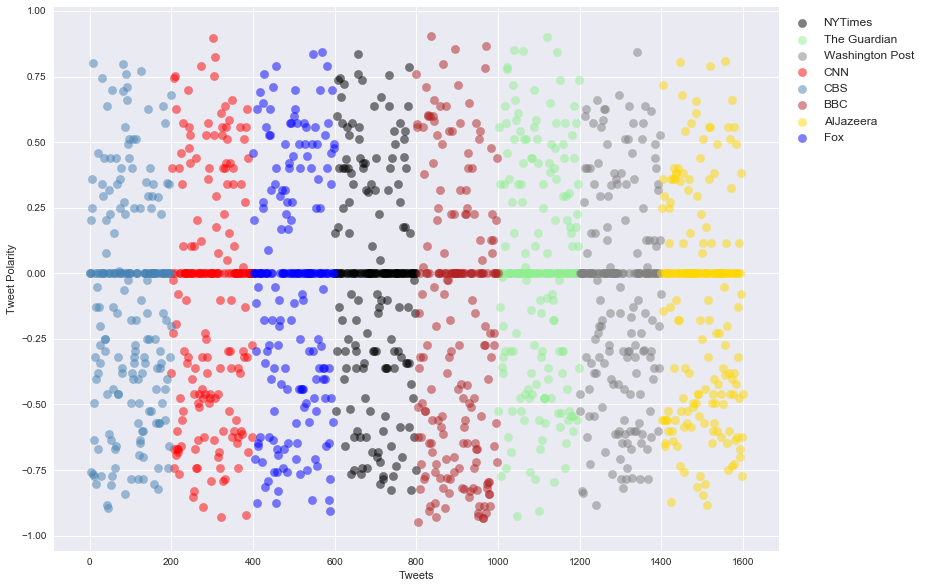

In [12]:
plt.figure(figsize=(13, 10))
plt.scatter(nytimes_df.index.tolist(), nytimes_df['compound'], marker='o', c='black', label='NYTimes', alpha=0.5, s=70)
plt.scatter(guard_df.index.tolist(), guard_df['compound'], marker='o', c='lightgreen', label='The Guardian', alpha=0.5, s=70)
plt.scatter(wapo_df.index.tolist(), wapo_df['compound'], marker='o', c='gray', label='Washington Post', alpha=0.5, s=70)
plt.scatter(cnn_df.index.tolist(), cnn_df['compound'], marker='o', c='red', label='CNN', alpha=0.5, s=70)
plt.scatter(cbs_df.index.tolist(), cbs_df['compound'], marker='o', c='steelblue', label='CBS', alpha=0.5, s=70)
plt.scatter(bbc_df.index.tolist(), bbc_df['compound'], marker='o', c='firebrick', label='BBC', alpha=0.5, s=70)
plt.scatter(aj_df.index.tolist(), aj_df['compound'], marker='o', c='gold', label='AlJazeera', alpha=0.5, s=70)
plt.scatter(fox_df.index.tolist(), fox_df['compound'], marker='o', c='blue', label='Fox', alpha=0.5, s=70)

plt.legend(loc=2, bbox_to_anchor=(1,1), prop={'size': 12})
plt.xlabel("Tweets")
plt.ylabel("Tweet Polarity")
plt.grid(True)
plt.show()

In [13]:
nytimes_df.loc[nytimes_df['compound'] > 0].count()

Account       59
Tweet_text    59
timestamp     59
compound      59
positive      59
negative      59
neutral       59
dtype: int64

In [14]:
avg_df.reset_index(inplace=True)


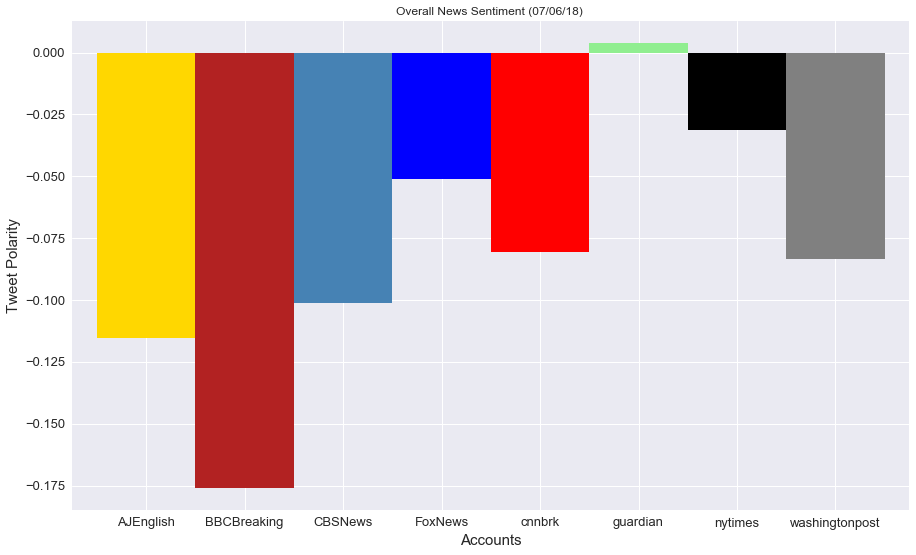

In [16]:
avg_df.plot('Account', 'compound', kind='bar', figsize=(15, 9), fontsize=13, legend=False, width=1, 
           color=['gold', 'firebrick', 'steelblue', 'blue', 'red', 'lightgreen', 'black', 'gray'])

plt.xticks(rotation="horizontal")
# plt.legend(loc=2, bbox_to_anchor=(1,1), prop={'size': 12})

plt.title("Overall News Sentiment (%s) " % (time.strftime("%x")))
plt.xlabel("Accounts", fontsize=15)
plt.ylabel("Tweet Polarity", fontsize=15)
plt.show()
